In [55]:
import pandas as pd

In [123]:
df = pd.read_csv('dataset-emotion.txt', names=['sentence', 'label'], sep=';')

In [124]:
len(df)

18000

In [125]:
df.head()

,sentence,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [126]:
category = pd.get_dummies(df.label)

In [127]:
category

,anger,fear,joy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
17995,0,0,0,0,1,0
17996,0,0,0,0,1,0
17997,0,0,1,0,0,0
17998,1,0,0,0,0,0


In [128]:
df_baru = pd.concat([df, category], axis=1)

In [129]:
df_baru

,sentence,label,anger,fear,joy,love,sadness,surprise
0,im feeling rather rotten so im not very ambiti...,sadness,0,0,0,0,1,0
1,im updating my blog because i feel shitty,sadness,0,0,0,0,1,0
2,i never make her separate from me because i do...,sadness,0,0,0,0,1,0
3,i left with my bouquet of red and yellow tulip...,joy,0,0,1,0,0,0
4,i was feeling a little vain when i did this one,sadness,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
17995,i just had a very brief time in the beanbag an...,sadness,0,0,0,0,1,0
17996,i am now turning and i feel pathetic that i am...,sadness,0,0,0,0,1,0
17997,i feel strong and good overall,joy,0,0,1,0,0,0
17998,i feel like this was such a rude comment and i...,anger,1,0,0,0,0,0


In [130]:
df_baru = df_baru.drop(columns='label')
df_baru

,sentence,anger,fear,joy,love,sadness,surprise
0,im feeling rather rotten so im not very ambiti...,0,0,0,0,1,0
1,im updating my blog because i feel shitty,0,0,0,0,1,0
2,i never make her separate from me because i do...,0,0,0,0,1,0
3,i left with my bouquet of red and yellow tulip...,0,0,1,0,0,0
4,i was feeling a little vain when i did this one,0,0,0,0,1,0
...,...,...,...,...,...,...,...
17995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
17996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
17997,i feel strong and good overall,0,0,1,0,0,0
17998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [131]:
kalimat = df_baru['sentence'].values

In [132]:
kalimat

array(['im feeling rather rotten so im not very ambitious right now',
       'im updating my blog because i feel shitty',
       'i never make her separate from me because i don t ever want her to feel like i m ashamed with her',
       ..., 'i feel strong and good overall',
       'i feel like this was such a rude comment and im glad that t',
       'i know a lot but i feel so stupid because i can not portray it'],
      dtype=object)

In [133]:
label = df_baru[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

In [134]:
label

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [135]:
from sklearn.model_selection import train_test_split
kalimat_latih, kalimat_test, label_latih, label_test = train_test_split(kalimat, label, test_size=0.2)

In [136]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [142]:
tokenizer = Tokenizer(num_words=3000, oov_token='x')

In [143]:
tokenizer.fit_on_texts(kalimat_latih)
tokenizer.fit_on_texts(kalimat_test)

In [144]:
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)

In [145]:
padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [146]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nAkurasi telah mencapai 92%")
      self.model.stop_training = True
callbacks = myCallback()

In [148]:
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=3000, output_dim=16),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [149]:
hist = model.fit(padded_latih, label_latih, epochs=20, validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/20
450/450 - 15s - loss: 1.3245 - accuracy: 0.4525 - val_loss: 0.8311 - val_accuracy: 0.7033
Epoch 2/20
450/450 - 13s - loss: 0.5686 - accuracy: 0.7992 - val_loss: 0.4812 - val_accuracy: 0.8322
Epoch 3/20
450/450 - 12s - loss: 0.3417 - accuracy: 0.8806 - val_loss: 0.4391 - val_accuracy: 0.8531
Epoch 4/20
450/450 - 12s - loss: 0.2505 - accuracy: 0.9117 - val_loss: 0.3498 - val_accuracy: 0.8856
Epoch 5/20
450/450 - 12s - loss: 0.1913 - accuracy: 0.9341 - val_loss: 0.3293 - val_accuracy: 0.8928

Akurasi telah mencapai 92%


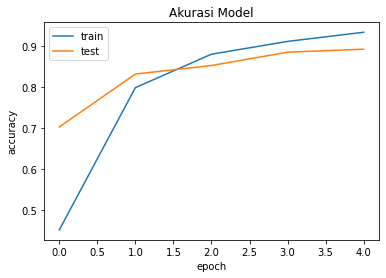

In [152]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()